In [2]:
#引入相关支持的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

#警告处理
warnings.filterwarnings('ignore')

filepath="covid.data"
df= pd.read_csv(filepath,sep=',')

print(df.shape)
df.head()

D:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(5434, 21)


,Breathing Problem,Fever,Dry Cough,Sorethroat,Running 0se,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,Outcome
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [2]:
#数据集的基本情况，查看是否有缺失值、空值、异常值等情况发生
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
Breathing Problem                          5434 non-null int64
Fever                                      5434 non-null int64
Dry Cough                                  5434 non-null int64
Sorethroat                                 5434 non-null int64
Running 0se                                5434 non-null int64
Asthma                                     5434 non-null int64
Chronic Lung Disease                       5434 non-null int64
Headache                                   5434 non-null int64
Heart Disease                              5434 non-null int64
Diabetes                                   5434 non-null int64
Hyper Tension                              5434 non-null int64
Fatigue                                    5434 non-null int64
Gastrointestinal                           5434 non-null int64
Abroad travel                              5434 non-null int64
Contact wit

In [3]:
#数据的描述，以及平均值、均方差、标准差、最大最小值等
df.describe()

,Breathing Problem,Fever,Dry Cough,Sorethroat,Running 0se,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,Outcome
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


1    4383
0    1051
Name: Outcome, dtype: int64


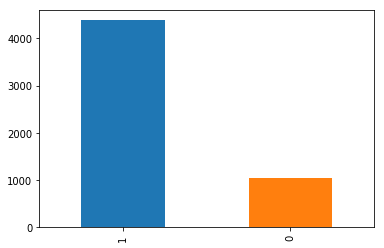

In [4]:
#最终结果显示感染新冠者与未感染新冠者的比率
print(df.Outcome.value_counts()) 
p=df.Outcome.value_counts().plot(kind="bar")

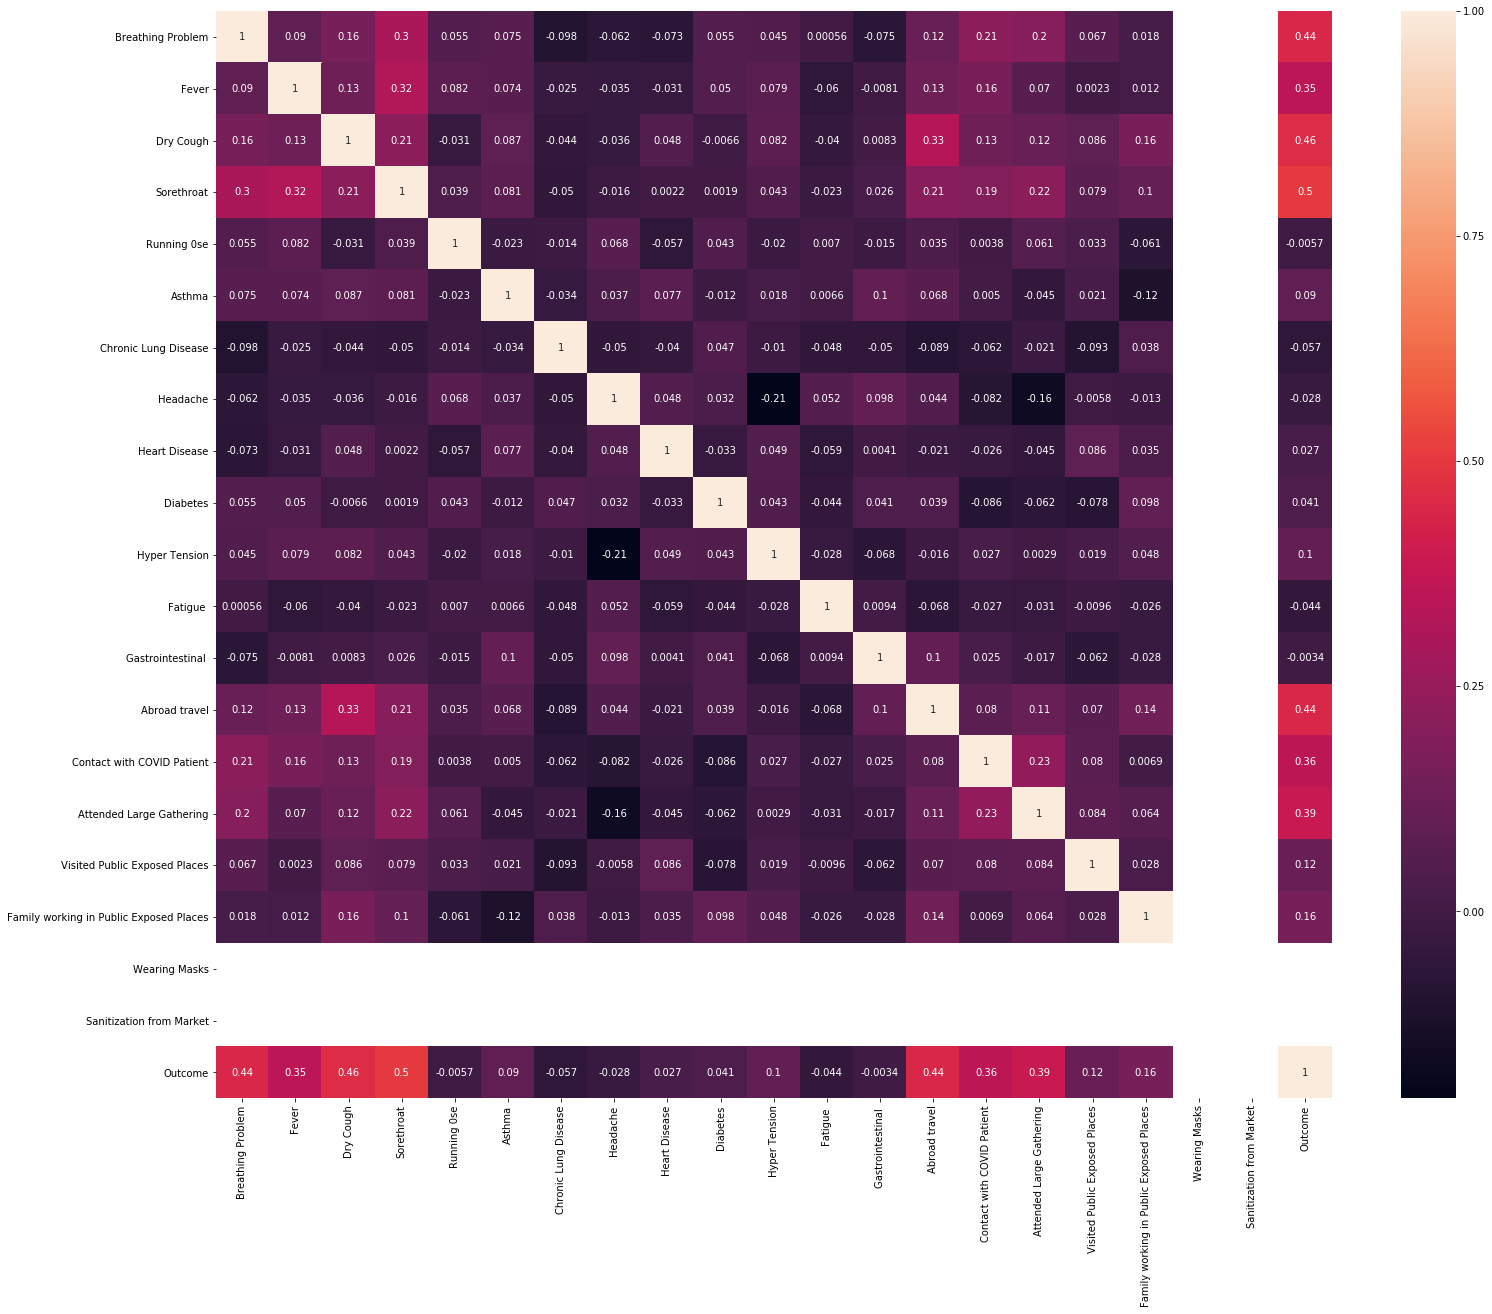

In [5]:
#计算特征相关性并可视化
corr_matrix = df.corr(method='spearman') #因为数据集较小，所以使用斯皮尔曼方法
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot= True)

In [29]:
# 决策树部分，帮助分析数据的特征

# 随机划分数据集
x_train, x_test, y_train, y_test = train_test_split(
        df.loc[:, df.columns != 'Outcome'],
        df['Outcome'],
        test_size = 0.12,                #分割比例
        random_state = 0,              #随机数种子
        shuffle = True,                 #打乱顺序 
        stratify=df['Outcome']                #因为分布不均匀，所以指定以y_data的比例做分层抽样
)

tree = DecisionTreeClassifier(max_depth = 12,random_state=0)
tree.fit(x_train, y_train)

print("训练集分数情况：: {:.3f}".format(tree.score(x_train, y_train)))
print("测试集分数情况: {:.3f}".format(tree.score(x_test, y_test)))
# output the feature importance
print("Feature importance:\n{}".format(tree.feature_importances_))

训练集分数情况：: 0.982
测试集分数情况: 0.985
Feature importance:
[2.25449891e-01 3.80009959e-02 8.26794119e-02 2.69571825e-01
 2.20213858e-03 1.11551838e-02 5.08675770e-03 5.82744025e-03
 1.45880790e-02 1.08570079e-04 6.66867976e-03 1.11376488e-02
 3.88887241e-03 2.03586872e-01 3.01831803e-02 8.01027520e-02
 1.94292852e-03 7.81877241e-03 0.00000000e+00 0.00000000e+00]


(0, 20)

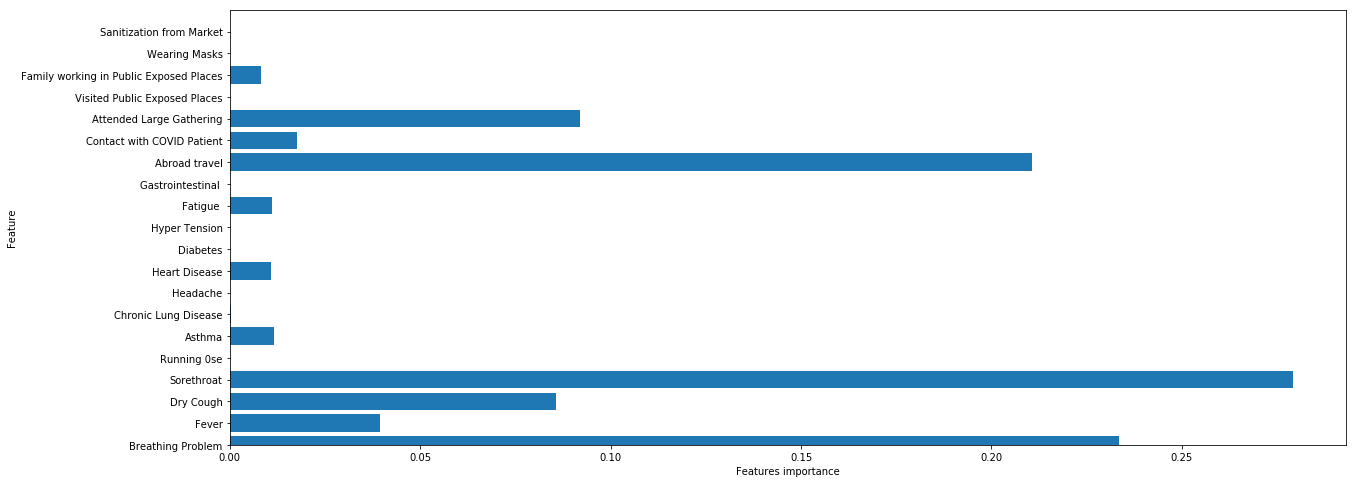

In [7]:
#利用决策树可视化特征重要性，分析哪些因素较为重要
diabetes_features = [x for i, x in enumerate(df.columns) if i != 20]
plt.figure(figsize=(20, 8))
n_features = 20
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), diabetes_features)
plt.xlabel("Features importance")
plt.ylabel("Feature")
plt.ylim(ymin = 0, ymax = n_features)

In [8]:
# KNN算法部分

# 随机划分数据集
x_train, x_test, y_train, y_test = train_test_split(
        df.loc[:, df.columns != 'Outcome'],
        df['Outcome'],
        test_size = 0.12,                #分割比例
        random_state = 0,              #随机数种子
        shuffle = True,                 #打乱顺序 
        stratify=df['Outcome']                #因为分布不均匀，所以指定以y_data的比例做分层抽样
)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train)
    training_accuracy.append(knn.score(x_train, y_train)) 
    test_accuracy.append(knn.score(x_test, y_test))

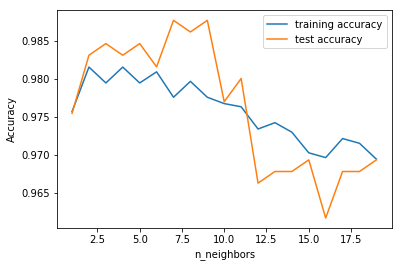

In [9]:
#利用KNN可视化，分析训练集与测试集之间的关系
plt.figure()
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [10]:
knn = KNeighborsClassifier(leaf_size = 38,n_neighbors = 9)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_train)
print("训练集分数情况: {:.3f}".format(knn.score(x_train, y_train)))
print("测试集分数情况: {:.3f}".format(knn.score(x_test, y_test)))
print('final score of model: {}'.format(f1_score(y_train,y_predict)))

训练集分数情况: 0.978
测试集分数情况: 0.989
final score of model: 0.9866597590985623


In [11]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=38, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [12]:
# 随机森林算法部分

# 随机划分数据集
x_train, x_test, y_train, y_test = train_test_split(
        df.loc[:, df.columns != 'Outcome'],
        df['Outcome'],
        test_size = 0.12,                #分割比例
        random_state = 0,              #随机数种子
        shuffle = True,                 #打乱顺序 
        stratify=df['Outcome']                #因为分布不均匀，所以指定以y_data的比例做分层抽样
)

training_accuracy = []
test_accuracy = []

depths = range(3, 12)
for depth in depths:
    Classifier  = RandomForestClassifier(max_depth = depth,n_estimators = 100)
    Classifier.fit(x_train, y_train)
    training_accuracy.append(Classifier.score(x_train, y_train)) 
    test_accuracy.append(Classifier.score(x_test, y_test))

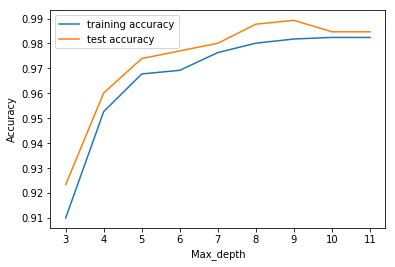

In [13]:
#利用随机森林可视化，分析训练集与测试集之间的关系
plt.figure()
plt.plot(depths, training_accuracy, label = "training accuracy")
plt.plot(depths, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max_depth")
plt.legend()

In [14]:
Classifier  = RandomForestClassifier(max_depth = 9, min_samples_leaf = 5, n_estimators = 100)
Classifier.fit(x_train,y_train)
print("训练集分数情况: {:.3f}".format(Classifier.score(x_train,y_train)))
print("测试集分数情况: {:.3f}".format(Classifier.score(x_test,y_test)))

训练集分数情况: 0.982
测试集分数情况: 0.989


In [15]:
Classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

(0, 20)

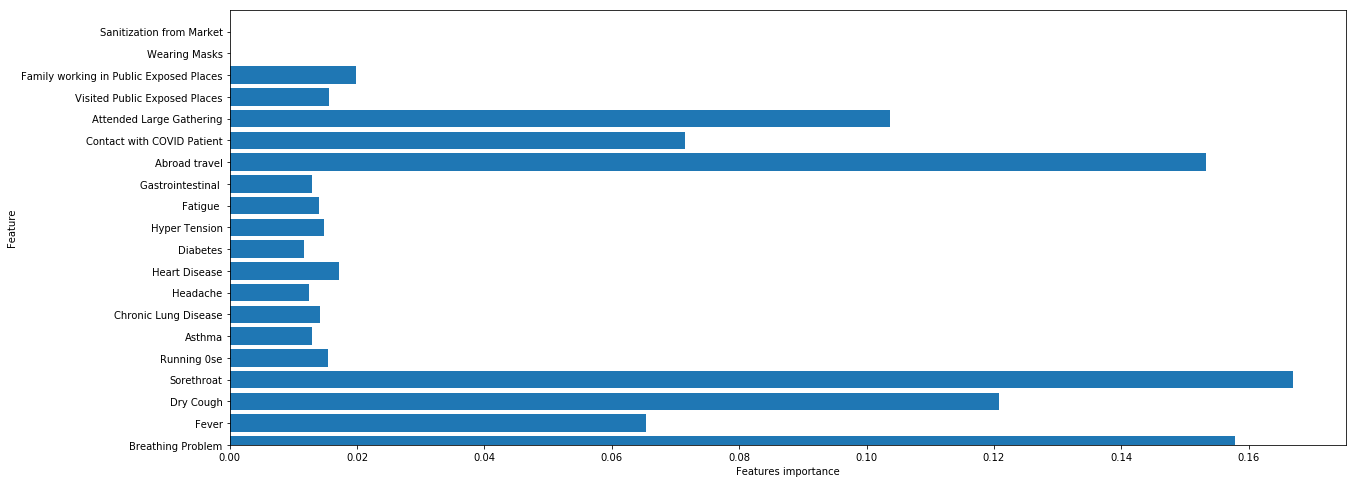

In [16]:
#利用随机森林可视化特征重要性，分析哪些因素较为重要
diabetes_features = [x for i, x in enumerate(df.columns) if i != 20]
plt.figure(figsize=(20, 8))
n_features = 20
plt.barh(range(n_features), Classifier.feature_importances_, align='center')
plt.yticks(np.arange(n_features), diabetes_features)
plt.xlabel("Features importance")
plt.ylabel("Feature")
plt.ylim(ymin = 0, ymax = n_features)

In [3]:
# 逻辑回归部分，重点分析与改进，以求出满意的结果
    
# 随机划分数据集
x_train, x_test, y_train, y_test = train_test_split(
        df.loc[:, df.columns != 'Outcome'],
        df['Outcome'],
        test_size = 0.12,                #分割比例
        random_state = 0,              #随机数种子
        shuffle = True,                 #打乱顺序 
        stratify=df['Outcome']                #因为分布不均匀，所以指定以y_data的比例做分层抽样
)

# logistic regression analysis

logreg = LogisticRegression(solver='liblinear').fit(x_train, y_train)

print("训练集的分数 : {:.3f}".format(logreg.score(x_train, y_train)))
print("测试集的分数: {:.3f}".format(logreg.score(x_test, y_test)))

训练集的分数 : 0.969
测试集的分数: 0.980


In [4]:
#分层交叉验证
strKFold = StratifiedKFold(n_splits = 5,shuffle = True,random_state = 0)
cv_score = cross_val_score(logreg, x_train, y_train, scoring = 'f1', cv = strKFold) 
print('cross validation score of raw model {}'.format(cv_score))

cross validation score of raw model [0.97817715 0.9806701  0.97439181 0.97861309 0.98841699]


In [5]:
#网格搜索所需的相关参数
c_range = [0.001,0.01,0.1,1.0,10]
solvers = ['liblinear','lbfgs','newton-cg','sag']
max_iters = [5,10,30,50,80] 
param_grid = dict(solver = solvers, max_iter = max_iters, C = c_range)

In [6]:
#网格搜素
grid = GridSearchCV(logreg, param_grid, cv = 5, scoring='f1')
grid.fit(x_train,y_train)
print('best score for model {}'.format(grid.best_score_))
#得出最好的模型
print('best parameters for model {}'.format(grid.best_estimator_))

best score for model 0.98106673647352
best parameters for model LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)


In [7]:
#lr = LogisticRegression(C = 0.1, max_iter=10, solver = 'lbfgs')
lr = LogisticRegression(C = 0.01)
lr.fit(x_train,y_train)
y_predict = lr.predict(x_train)
print("训练集分数情况: {:.3f}".format(lr.score(x_train, y_train)))
print("测试集分数情况: {:.3f}".format(lr.score(x_test, y_test)))
print('final score of model: {}'.format(f1_score(y_train,y_predict)))

训练集分数情况: 0.924
测试集分数情况: 0.928
final score of model: 0.9549281822684497


In [7]:
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
#SVM向量机部分
x_train = x_train.astype(np.int64)
y_train = y_train.astype(np.int64)
x_test = x_test.astype(np.int64)
y_test = y_test.astype(np.int64)

In [25]:
svc = SVC()
svc.fit(x_train, y_train)
print("训练集分数情况: {:.3f}".format(svc.score(x_train, y_train)))
print("测试集分数情况: {:.3f}".format(svc.score(x_test, y_test)))

训练集分数情况: 0.977
测试集分数情况: 0.986


In [29]:
svcc = MinMaxScaler()
x_train_scaled = svcc.fit_transform(x_train)
x_test_scaled = svcc.fit_transform(x_test)

In [30]:
svc = SVC()
svc.fit(x_train_scaled, y_train)
print("训练集分数情况: {:.3f}".format(svc.score(x_train_scaled, y_train)))
print("测试集分数情况: {:.3f}".format(svc.score(x_test_scaled, y_test)))

训练集分数情况: 0.977
测试集分数情况: 0.986


In [40]:
#网格搜索所需的相关参数
c_range = [30,50,100,150,300]
cache_range = [30,50,80,100,120]
degrees = [1,3,5,8,10]
param_grid = dict(cache_size = cache_range, degree = degrees, C = c_range)

In [41]:
#网格搜素
grid = GridSearchCV(svc, param_grid, cv = 5, scoring='f1')
grid.fit(x_train,y_train)
print('best score for model {}'.format(grid.best_score_))
#得出最好的模型
print('best parameters for model {}'.format(grid.best_estimator_))

best score for model 0.9890508217720253
best parameters for model SVC(C=100, cache_size=30, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [45]:
svc = SVC(C=100, cache_size=100,degree = 1)
svc.fit(x_train_scaled, y_train)
print("训练集分数情况: {:.3f}".format(svc.score(x_train_scaled, y_train)))
print("训练集分数情况: {:.3f}".format(svc.score(x_test_scaled, y_test)))

训练集分数情况: 0.982
训练集分数情况: 0.985


In [46]:
svc

SVC(C=100, cache_size=100, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
from tkinter import*

def run():
    global root
    root.destroy()
    root1 = Tk()
    root1.geometry('200x200')
    root1.title('判断结果')

    s1=CheckVar1.get()
    s2=CheckVar2.get()
    s3=CheckVar3.get()
    s4=CheckVar4.get()
    s5=CheckVar5.get()
    s6=CheckVar6.get()
    s7=CheckVar7.get()
    s8=CheckVar8.get()
    s9=CheckVar9.get()
    s10=CheckVar10.get()
    s11=CheckVar11.get()
    s12=CheckVar12.get()
    s13=CheckVar13.get()
    s14=CheckVar14.get()
    s15=CheckVar15.get()
    s16=CheckVar16.get()
    s17=CheckVar17.get()
    s18=CheckVar18.get()
    s19=CheckVar19.get()
    s20=CheckVar20.get()

    if lr.predict(np.array([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20]).reshape(1, -1))[0]==0:
        s = '未患有新冠肺炎'
    else:
        s = '患有新冠肺炎'

    lb2 = Label(root1,text=s)
    lb2.pack()

    root1.mainloop()

root = Tk()
root.geometry('400x800')
root.title('简易判断是否患新冠肺炎')

lb1 = Label(root, text='请根据自身真实状况填写')
lb1.pack()

CheckVar1 = IntVar()
CheckVar2 = IntVar()
CheckVar3 = IntVar()
CheckVar4 = IntVar()
CheckVar5 = IntVar()
CheckVar6 = IntVar()
CheckVar7 = IntVar()
CheckVar8 = IntVar()
CheckVar9 = IntVar()
CheckVar10 = IntVar()
CheckVar11 = IntVar()
CheckVar12 = IntVar()
CheckVar13 = IntVar()
CheckVar14 = IntVar()
CheckVar15 = IntVar()
CheckVar16 = IntVar()
CheckVar17 = IntVar()
CheckVar18 = IntVar()
CheckVar19 = IntVar()
CheckVar20 = IntVar()

ch1  = Checkbutton(root,text='呼吸困难  \t',variable = CheckVar1,onvalue=1,offvalue=0)
ch2  = Checkbutton(root,text='有过发烧  \t',variable = CheckVar2,onvalue=1,offvalue=0)
ch3  = Checkbutton(root,text='有过干咳  \t',variable = CheckVar3,onvalue=1,offvalue=0)
ch4  = Checkbutton(root,text='患有疥螨  \t',variable = CheckVar4,onvalue=1,offvalue=0)
ch5  = Checkbutton(root,text='感到乏力  \t',variable = CheckVar5,onvalue=1,offvalue=0)
ch6  = Checkbutton(root,text='患有哮喘  \t',variable = CheckVar6,onvalue=1,offvalue=0)
ch7  = Checkbutton(root,text='慢性肺病  \t',variable = CheckVar7,onvalue=1,offvalue=0)
ch8  = Checkbutton(root,text='感到头痛  \t',variable = CheckVar8,onvalue=1,offvalue=0)
ch9  = Checkbutton(root,text='患心脏病  \t',variable = CheckVar9,onvalue=1,offvalue=0)
ch10 = Checkbutton(root,text='患糖尿病  \t',variable = CheckVar10,onvalue=1,offvalue=0)
ch11 = Checkbutton(root,text='患高血压  \t',variable = CheckVar11,onvalue=1,offvalue=0)
ch12 = Checkbutton(root,text='身体疲劳  \t',variable = CheckVar12,onvalue=1,offvalue=0)
ch13 = Checkbutton(root,text='胃肠疾病  \t',variable = CheckVar13,onvalue=1,offvalue=0)
ch14 = Checkbutton(root,text='出国旅行  \t',variable = CheckVar14,onvalue=1,offvalue=0)
ch15 = Checkbutton(root,text='接触患者  \t',variable = CheckVar15,onvalue=1,offvalue=0)
ch16 = Checkbutton(root,text='参加聚会  \t',variable = CheckVar16,onvalue=1,offvalue=0)
ch19 = Checkbutton(root,text='有戴口罩  \t',variable = CheckVar19,onvalue=1,offvalue=0)
ch20 = Checkbutton(root,text='市场卫生  \t',variable = CheckVar20,onvalue=1,offvalue=0)
ch17 = Checkbutton(root,text='去过公共场所\t',variable = CheckVar17,onvalue=1,offvalue=0)
ch18 = Checkbutton(root,text='公共场所工作\t',variable = CheckVar18,onvalue=1,offvalue=0)

ch1.pack()
ch2.pack()
ch3.pack()
ch4.pack()
ch5.pack()
ch6.pack()
ch7.pack()
ch8.pack()
ch9.pack()
ch10.pack()
ch11.pack()
ch12.pack()
ch13.pack()
ch14.pack()
ch15.pack()
ch16.pack()
ch17.pack()
ch18.pack()
ch19.pack()
ch20.pack()

btn1 = Button(root,text="OK",command=run)
btn1.pack()

root.mainloop()

